## Figure 4 Code to Produce Figures

This figure will focus on the presentation of Further Analysis of Extracted Assemblies.

In [1]:
# importing packages
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import squareform, pdist
import scipy.io
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from difflib import diff_bytes
import seaborn as sns
import h5py
import scipy
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (10,10)

### Power Analysis for Chain Motif Results

In [4]:
# estimate sample size via power analysis: All Assemblies Together
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
nobs1 = 109
effect = 153 / 100
alpha = 0.05
p = 0.95
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power= p, nobs1= None, ratio= 58 / nobs1, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 17.345


In [5]:
# estimate sample size via power analysis
from statsmodels.stats.power import tt_ind_solve_power
# parameters for power analysis
nobs1_array = [13, 6, 5, 6, 6, 9, 4, 41, 23, 11, 7, 12, 12, 6, 11]
mean_diff_by_difference = [26.24, 29.24, 29.24, 29.24, 29.24, 29.24, 29.24, 3.19, 5.24, 26.33, 10.47, 28.82, 28.66, 27.74, 21.24]
alpha = 0.05
# perform power analysis
for i, n in enumerate(nobs1_array):
    effect = mean_diff_by_difference[i] / 30
    r =  58 / n
    result = tt_ind_solve_power(effect_size = effect, nobs1 = None, alpha = alpha, power = 0.95, ratio = r)
    print(f'Sample Size for Assembly {i + 1}: %.3f' % result)

Sample Size for Assembly 1: 21.151
Sample Size for Assembly 2: 15.277
Sample Size for Assembly 3: 15.012
Sample Size for Assembly 4: 15.277
Sample Size for Assembly 5: 15.277
Sample Size for Assembly 6: 16.064
Sample Size for Assembly 7: 14.747
Sample Size for Assembly 8: 1962.506
Sample Size for Assembly 9: 595.391
Sample Size for Assembly 10: 20.381
Sample Size for Assembly 11: 119.771
Sample Size for Assembly 12: 17.330
Sample Size for Assembly 13: 17.520
Sample Size for Assembly 14: 16.953
Sample Size for Assembly 15: 31.150


### Oracle Scores Assemblies

In [10]:
### Functions relevant for Oracle Score Analysis

def distance(x, y):
    return math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

# def process(img):
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img_canny = cv2.Canny(img_gray, 0, 50)
#     img_dilate = cv2.dilate(img_canny, None, iterations=1)
#     img_erode = cv2.erode(img_dilate, None, iterations=1)
#     return img_erode

def get_assembly_time_trace(coactivity_trace, scores_in_order, name='scored_time_trace'):
    # Set up three subplots
    num_assemblies = coactivity_trace.shape[1]
    fig, ax = plt.subplots(num_assemblies, 1, figsize=(12, 12))

    # plot
    for i in range(num_assemblies):
        ax[i].plot(coactivity_trace[:, i], color='green')
        ax[i].set_ylabel(f"{scores_in_order[i]:.2}")
        ax[i].set_xlabel("Time Steps")
        ax[i].grid()

    fig.suptitle("Assembly Time Trace")
    #plt.savefig(f"oracle_dists2/assemblies_esteps_150000_affinity_04_{name}.png", dpi = 1200)

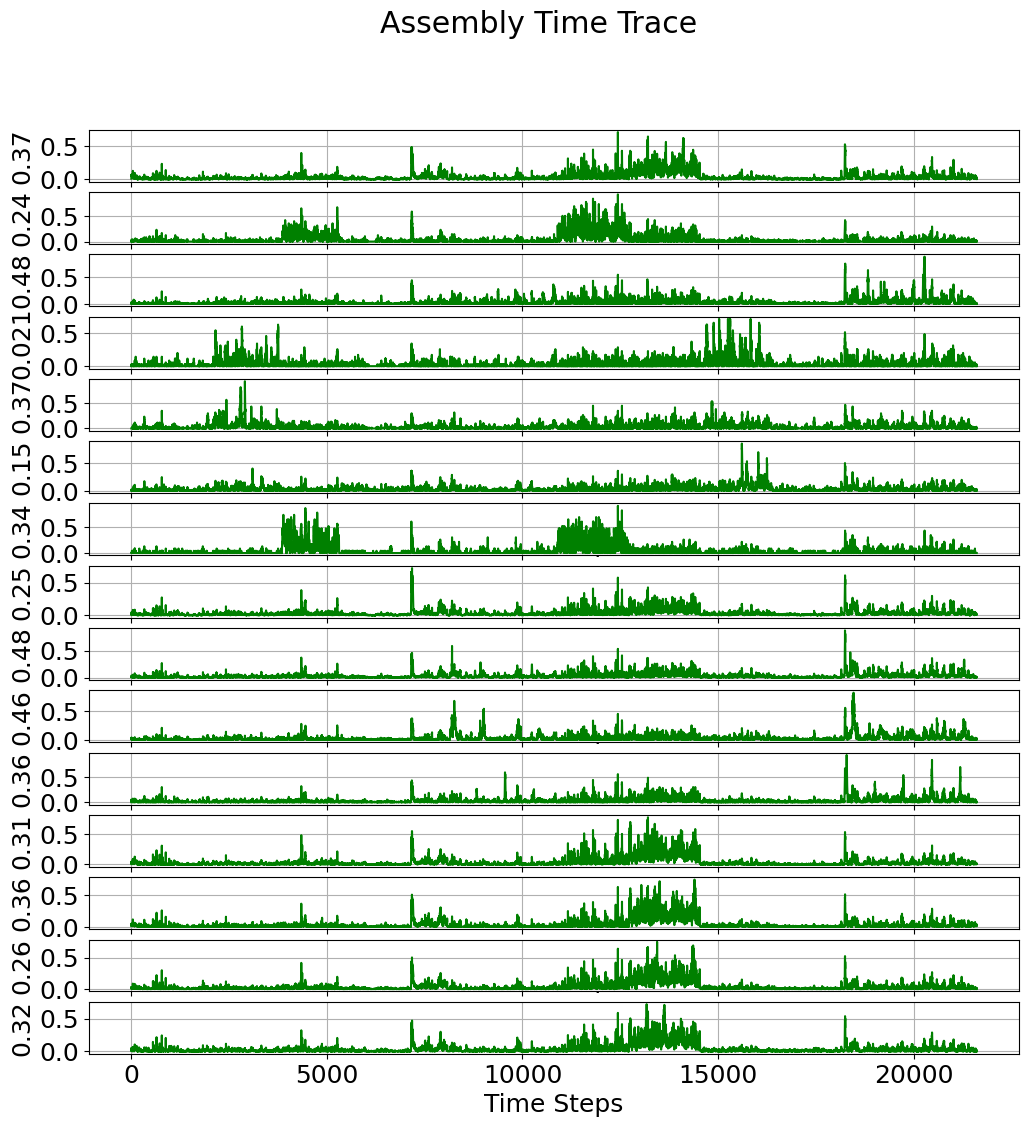

In [6]:
ACTIVITY_RASTER = scipy.io.loadmat(
    "../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_ACTIVITY-RASTER.mat", struct_as_record=True, squeeze_me=True)
SGC_ASSEMBLIES = scipy.io.loadmat(
    "../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)

#print(ACTIVITY_RASTER.keys())

activity_raster = ACTIVITY_RASTER['activity_raster']
activity_raster_peaks = ACTIVITY_RASTER['activity_raster_peaks']

coactivity_trace = activity_raster.mean(axis=1)

assemblies = SGC_ASSEMBLIES['assemblies']
#print(assemblies)
assembly_coactivity_trace = np.vstack(
    [activity_raster[:, A-1].mean(axis=1) for A in assemblies]).T

scores_in_order = np.load('oracle_dists/assemblies_esteps_150000_affinity_04_session13_natural_movie_oracle_scores.npy')
get_assembly_time_trace(assembly_coactivity_trace, scores_in_order)

In [42]:
nwb_f = h5py.File('M409828_13_20181213.nwb', 'r')
import v1dd_physiology.data_fetching as daf

sess_id = daf.get_session_id(nwb_f=nwb_f)
print(sess_id)

# plane_ns = daf.get_plane_names(nwb_f=nwb_f)
# print("Planes: ", plane_ns)

# for plane_n in plane_ns:
#     depth = daf.get_plane_depth(nwb_f=nwb_f, plane_n=plane_n)
#     print(f'depth of {plane_n}: {depth} um')

fs = []
dffs = []
events = []
locomotions = []
rois = []
pika_rois = []
coords = []

# Uncomment this if you want the actual fluorescence activity trace
# f = np.array(nwb_f['processing']['rois_and_traces_plane0']
#              ['Fluorescence']['f_raw_subtracted'].get('data'))

# If you want DFF, you need to compute it using the allensdk, or load saved traces from /home/berteau/v1DD

f = assembly_coactivity_trace
# print(coactivity_trace)
f_ts = np.array(nwb_f['processing']['rois_and_traces_plane0']
                ['Fluorescence']['f_raw_subtracted'].get('timestamps'))
# events
clip_ts = f.shape[1]

total_movie_oracle_r_values = np.zeros((0, 9))

passing_roi_count = f.shape[1]

oracle_r_values = np.zeros((passing_roi_count, 25, 8))
movie_oracle_r_values = np.zeros((passing_roi_count, 9))

M409828_13


In [9]:
plane_ns = daf.get_plane_names(nwb_f=nwb_f)
plane_ns
rois_dict = {}
for plane_n in plane_ns:
    roi_ns = daf.get_roi_ns(nwb_f=nwb_f, plane_n=plane_n)
    print(f'there are {len(roi_ns)} in {plane_n} of session: {sess_id}:')
    print('\nnames of first 100 rois:\n')
    print(roi_ns[0:100])
    rois_dict[plane_n] = roi_ns

there are 1234 in plane0 of session: M409828_13:

names of first 100 rois:

['roi_0000', 'roi_0001', 'roi_0002', 'roi_0003', 'roi_0004', 'roi_0005', 'roi_0006', 'roi_0007', 'roi_0008', 'roi_0009', 'roi_0010', 'roi_0011', 'roi_0012', 'roi_0013', 'roi_0014', 'roi_0015', 'roi_0016', 'roi_0017', 'roi_0018', 'roi_0019', 'roi_0020', 'roi_0021', 'roi_0022', 'roi_0023', 'roi_0024', 'roi_0025', 'roi_0026', 'roi_0027', 'roi_0028', 'roi_0029', 'roi_0030', 'roi_0031', 'roi_0032', 'roi_0033', 'roi_0034', 'roi_0035', 'roi_0036', 'roi_0037', 'roi_0038', 'roi_0039', 'roi_0040', 'roi_0041', 'roi_0042', 'roi_0043', 'roi_0044', 'roi_0045', 'roi_0046', 'roi_0047', 'roi_0048', 'roi_0049', 'roi_0050', 'roi_0051', 'roi_0052', 'roi_0053', 'roi_0054', 'roi_0055', 'roi_0056', 'roi_0057', 'roi_0058', 'roi_0059', 'roi_0060', 'roi_0061', 'roi_0062', 'roi_0063', 'roi_0064', 'roi_0065', 'roi_0066', 'roi_0067', 'roi_0068', 'roi_0069', 'roi_0070', 'roi_0071', 'roi_0072', 'roi_0073', 'roi_0074', 'roi_0075', 'roi_0076',

In [10]:
assembly_neurons = set()
for assembly in assemblies:
    assembly_neurons.update(set(assembly))
assembly_neurons = np.array(list(assembly_neurons))
len(assembly_neurons)

1960

['T-test: 0.887', 'T-test: 0.786']


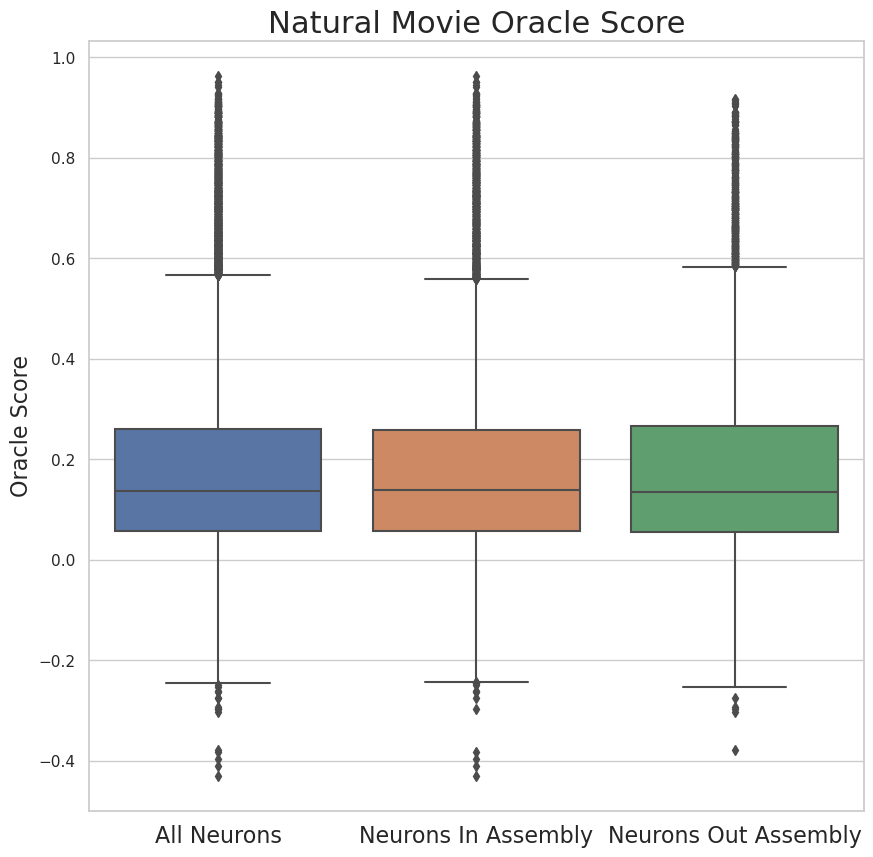

In [12]:
pika_rois_all_dict = {}
pika_rois_in_assembly_dict = {}
pika_rois_no_assembly_dict = {}
for plane_n, roi_ns in rois_dict.items():
    pika_rois = []
    pika_rois_in_assembly = []
    pika_rois_no_assembly = []
    # print(plane_n)
    for roi_n in roi_ns:
        score = daf.get_pika_classifier_score(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n)
        if score > 0.5:  # Using the threshold from team PIKA, per https://github.com/zhuangjun1981/v1dd_physiology/blob/main/v1dd_physiology/example_notebooks/2022-06-27-data-fetching-basic.ipynb
            pika_rois.append(roi_n)
            if int(roi_n[4:]) in assembly_neurons:
                pika_rois_in_assembly.append(roi_n)
            else:
                pika_rois_no_assembly.append(roi_n)
    pika_rois_all_dict[plane_n] = pika_rois
    pika_rois_in_assembly_dict[plane_n] = pika_rois_in_assembly
    pika_rois_no_assembly_dict[plane_n] = pika_rois_no_assembly

total_rois = np.sum([len(val) for val in pika_rois_all_dict.values()])
neuron_all_movie_oracle_r_values = np.zeros((total_rois, 9))

total_rois = np.sum([len(val) for val in pika_rois_in_assembly_dict.values()])
neuron_in_assembly_movie_oracle_r_values = np.zeros((total_rois, 9))

total_rois = np.sum([len(val) for val in pika_rois_no_assembly_dict.values()])
neuron_no_assembly_movie_oracle_r_values = np.zeros((total_rois, 9))

count_n_all = -1
count_n_in_assembly = -1
count_n_no_assembly = -1
for curr_dict, oracle_array, c in zip([pika_rois_all_dict, pika_rois_in_assembly_dict, pika_rois_no_assembly_dict], 
        [neuron_all_movie_oracle_r_values, neuron_in_assembly_movie_oracle_r_values, neuron_no_assembly_movie_oracle_r_values],
        [1,2,3]):
    for plane_n, pika_roi_ns in curr_dict.items():
        for roi_n in pika_roi_ns:
            if c == 1:
                count_n_all += 1
                current_count = count_n_all
            elif c == 2:
                count_n_in_assembly += 1
                current_count = count_n_in_assembly
            elif c == 3:
                count_n_no_assembly += 1
                current_count = count_n_no_assembly
            ### Get Time Trace
            f, f_ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='subtracted')

            # Get Repeated Natural Movies
            trial_fluorescence = []
            presentation = nwb_f['stimulus']['presentation']
            nm_timestamps = np.array(
                presentation['natural_movie'].get('timestamps'))
            nm_data = np.array(presentation['natural_movie'].get('data'))
            new_clips = np.where(nm_data[:, 2] == 0)[0]
            clip_duration = 300  # new_clips[1]-1
            for repeat_id in range(new_clips.shape[0]):
                frames_to_capture = np.where(f_ts >= nm_timestamps[new_clips[repeat_id]])[
                    0][0:clip_duration]
                trial_fluorescence.append(f[frames_to_capture])
            trial_fluorescence_np = np.array(trial_fluorescence)
            for trial_idx in range(trial_fluorescence_np.shape[0]):
                removed_trial = trial_fluorescence_np[trial_idx]
                remaining_trials = np.delete(
                    trial_fluorescence_np, trial_idx, 0)
                r, p = scipy.stats.pearsonr(
                    removed_trial, np.mean(remaining_trials, 0))
                oracle_array[current_count, trial_idx] = r

groups_p_values = ['T-test: {:.3g}'.format(stats.ttest_ind(np.array(neuron_all_movie_oracle_r_values).flatten(), np.array(neuron_in_assembly_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5),
                    'T-test: {:.3g}'.format(stats.ttest_ind(np.array(neuron_all_movie_oracle_r_values).flatten(), np.array(neuron_no_assembly_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5)]


all_arr = [np.array(neuron_all_movie_oracle_r_values).flatten(),
            np.array(neuron_in_assembly_movie_oracle_r_values).flatten(),
            np.array(neuron_no_assembly_movie_oracle_r_values).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr)
ax.set_xticklabels(["All Neurons", "Neurons In Assembly", "Neurons Out Assembly"], size = 16)
ax.set_title('Natural Movie Oracle Score', size = 22)
ax.set_ylabel('Oracle Score', size = 16)

print(groups_p_values)

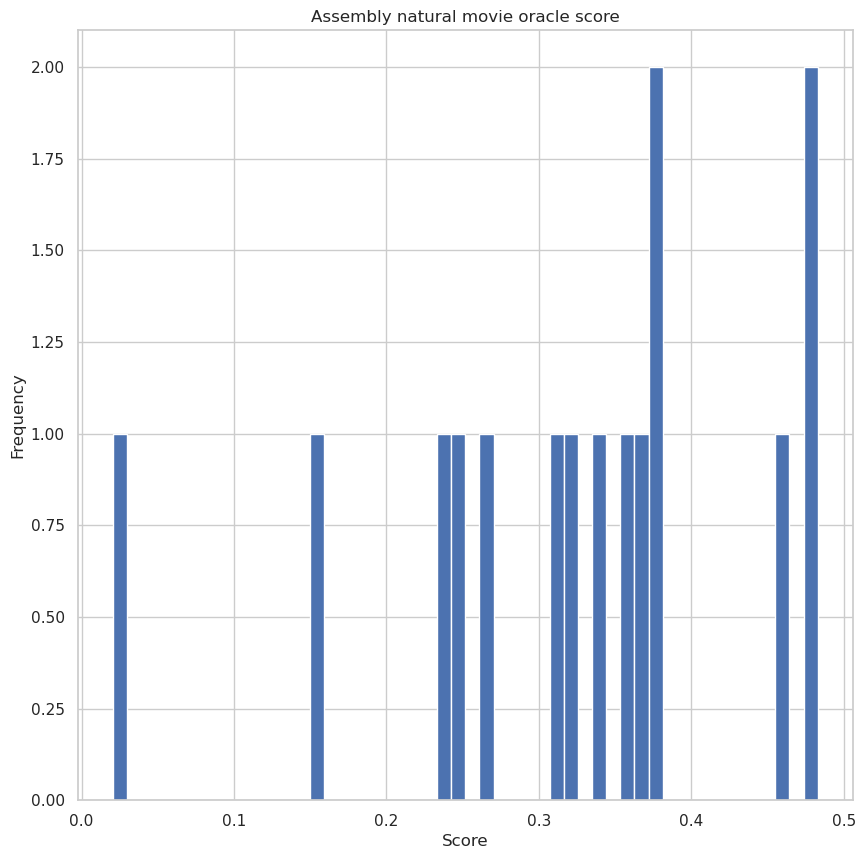

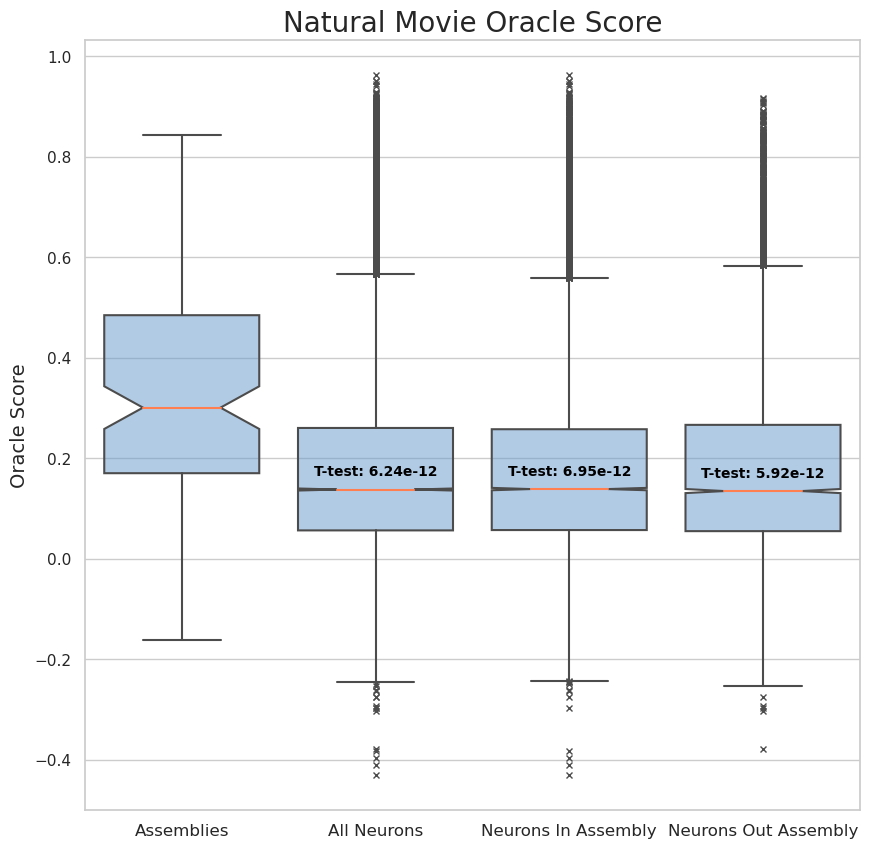

In [15]:
movie_oracle_r_values = np.zeros((passing_roi_count, 9))
f = assembly_coactivity_trace
# print(coactivity_trace)
f_ts = np.array(nwb_f['processing']['rois_and_traces_plane0']
                ['Fluorescence']['f_raw_subtracted'].get('timestamps'))
for roi_n in range(passing_roi_count):

    # Get Repeated Natural Movies
    trial_fluorescence = []
    presentation = nwb_f['stimulus']['presentation']
    nm_timestamps = np.array(
        presentation['natural_movie'].get('timestamps'))
    nm_data = np.array(presentation['natural_movie'].get('data'))
    new_clips = np.where(nm_data[:, 2] == 0)[0]
    clip_duration = 300  # new_clips[1]-1
    for repeat_id in range(new_clips.shape[0]):
        frames_to_capture = np.where(f_ts >= nm_timestamps[new_clips[repeat_id]])[
            0][0:clip_duration]
        trial_fluorescence.append(f[frames_to_capture, roi_n])
    trial_fluorescence_np = np.array(trial_fluorescence)
    for trial_idx in range(trial_fluorescence_np.shape[0]):
        removed_trial = trial_fluorescence_np[trial_idx]
        remaining_trials = np.delete(
            trial_fluorescence_np, trial_idx, 0)
        r, p = scipy.stats.pearsonr(
            removed_trial, np.mean(remaining_trials, 0))
        movie_oracle_r_values[roi_n, trial_idx] = r

    # get_assembly_time_trace(trial_fluorescence_np.T, movie_oracle_r_values[roi_n, :], name=f'r_value_over_each_natural_movie_assembly{roi_n}')

    # total_movie_oracle_r_values = np.append(
    #     total_movie_oracle_r_values, movie_oracle_r_values, 0)
# Plot Movie Oracles
mean_over_holdouts = np.mean(movie_oracle_r_values, 1)
fig = plt.figure()
plt.title('Assembly natural movie oracle score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.hist(mean_over_holdouts[:], bins=50)
plt.savefig('oracle_dists2/assemblies_esteps_150000__affinity_04_session'+str(13)+'_movies.png')
plt.show()


all_arr = [np.array(movie_oracle_r_values).flatten(),
            np.array(neuron_all_movie_oracle_r_values).flatten(),
            np.array(neuron_in_assembly_movie_oracle_r_values).flatten(),
            np.array(neuron_no_assembly_movie_oracle_r_values).flatten()]

sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Assemblies", "All Neurons", "Neurons In Assembly", "Neurons Out Assembly"], size = 12)
ax.set_title('Natural Movie Oracle Score', size = 20)
ax.set_ylabel('Oracle Score', size = 14)

medians = np.array(
    [np.median(np.array(movie_oracle_r_values).flatten()),
     np.median(np.array(neuron_all_movie_oracle_r_values).flatten()),
     np.median(np.array(neuron_in_assembly_movie_oracle_r_values).flatten()),
     np.median(np.array(neuron_no_assembly_movie_oracle_r_values).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'T-test: {:.3g}'.format(stats.ttest_ind(np.array(movie_oracle_r_values).flatten(), np.array(neuron_all_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5),
            'T-test: {:.3g}'.format(stats.ttest_ind(np.array(movie_oracle_r_values).flatten(), np.array(neuron_in_assembly_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5),
            'T-test: {:.3g}'.format(stats.ttest_ind(np.array(movie_oracle_r_values).flatten(), np.array(neuron_no_assembly_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('oracle_scores_histogram_f_subtracted.png', dpi = 1200)
plt.show()

# plt.close()
# np.save('oracle_dists2/assemblies_esteps_150000_affinity_04_session'+str(13)+
#         '_natural_movie_oracle_r_values.npy', movie_oracle_r_values)
# np.save('oracle_dists2/assemblies_esteps_150000_affinity_04_session'+str(13)+
#         '_natural_movie_oracle_scores.npy', mean_over_holdouts)

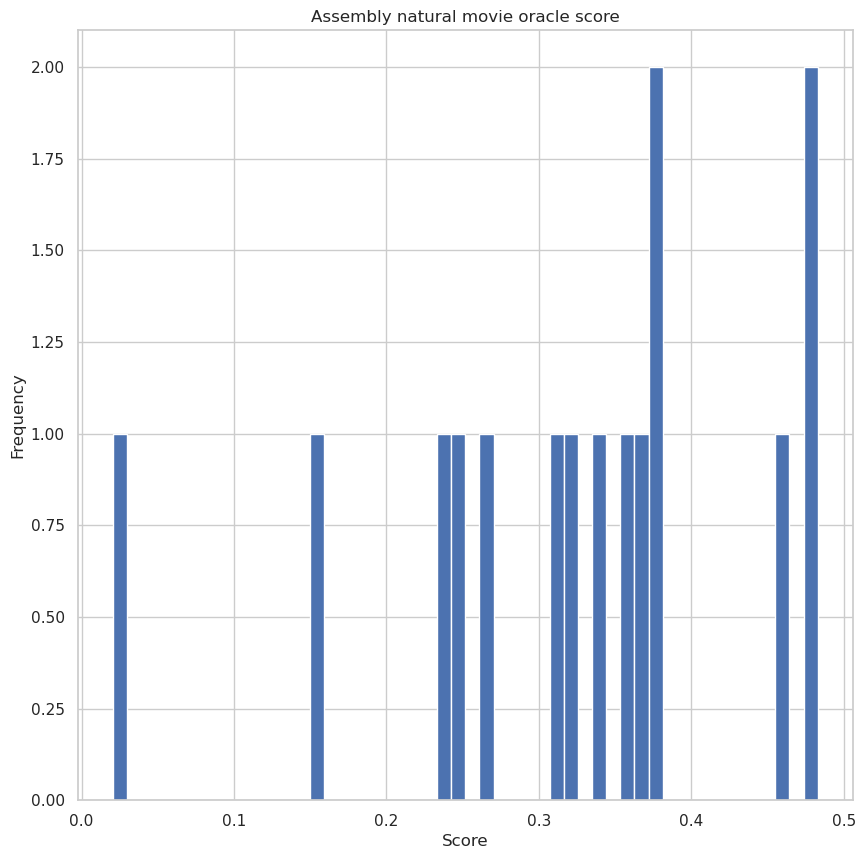

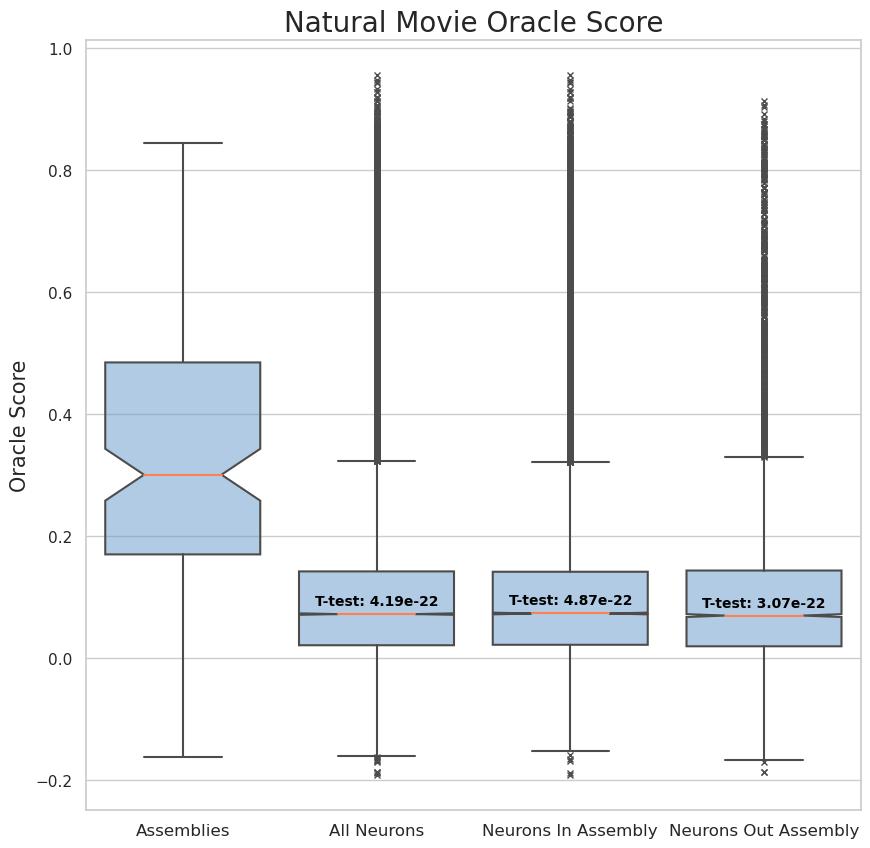

In [16]:
pika_rois_all_dict = {}
pika_rois_in_assembly_dict = {}
pika_rois_no_assembly_dict = {}
for plane_n, roi_ns in rois_dict.items():
    pika_rois = []
    pika_rois_in_assembly = []
    pika_rois_no_assembly = []
    # print(plane_n)
    for roi_n in roi_ns:
        score = daf.get_pika_classifier_score(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n)
        if score > 0.5:  # Using the threshold from team PIKA, per https://github.com/zhuangjun1981/v1dd_physiology/blob/main/v1dd_physiology/example_notebooks/2022-06-27-data-fetching-basic.ipynb
            pika_rois.append(roi_n)
            if int(roi_n[4:]) in assembly_neurons:
                pika_rois_in_assembly.append(roi_n)
            else:
                pika_rois_no_assembly.append(roi_n)
    pika_rois_all_dict[plane_n] = pika_rois
    pika_rois_in_assembly_dict[plane_n] = pika_rois_in_assembly
    pika_rois_no_assembly_dict[plane_n] = pika_rois_no_assembly

total_rois = np.sum([len(val) for val in pika_rois_all_dict.values()])
neuron_all_movie_oracle_r_values = np.zeros((total_rois, 9))

total_rois = np.sum([len(val) for val in pika_rois_in_assembly_dict.values()])
neuron_in_assembly_movie_oracle_r_values = np.zeros((total_rois, 9))

total_rois = np.sum([len(val) for val in pika_rois_no_assembly_dict.values()])
neuron_no_assembly_movie_oracle_r_values = np.zeros((total_rois, 9))

count_n_all = -1
count_n_in_assembly = -1
count_n_no_assembly = -1
for curr_dict, oracle_array, c in zip([pika_rois_all_dict, pika_rois_in_assembly_dict, pika_rois_no_assembly_dict], 
        [neuron_all_movie_oracle_r_values, neuron_in_assembly_movie_oracle_r_values, neuron_no_assembly_movie_oracle_r_values],
        [1,2,3]):
    for plane_n, pika_roi_ns in curr_dict.items():
        for roi_n in pika_roi_ns:
            if c == 1:
                count_n_all += 1
                current_count = count_n_all
            elif c == 2:
                count_n_in_assembly += 1
                current_count = count_n_in_assembly
            elif c == 3:
                count_n_no_assembly += 1
                current_count = count_n_no_assembly
            ### Get Time Trace
            dff, dff_ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='dff')

            # Get Repeated Natural Movies
            trial_fluorescence = []
            presentation = nwb_f['stimulus']['presentation']
            nm_timestamps = np.array(
                presentation['natural_movie'].get('timestamps'))
            nm_data = np.array(presentation['natural_movie'].get('data'))
            new_clips = np.where(nm_data[:, 2] == 0)[0]
            clip_duration = 300  # new_clips[1]-1
            for repeat_id in range(new_clips.shape[0]):
                frames_to_capture = np.where(dff_ts >= nm_timestamps[new_clips[repeat_id]])[
                    0][0:clip_duration]
                trial_fluorescence.append(dff[frames_to_capture])
            trial_fluorescence_np = np.array(trial_fluorescence)
            for trial_idx in range(trial_fluorescence_np.shape[0]):
                removed_trial = trial_fluorescence_np[trial_idx]
                remaining_trials = np.delete(
                    trial_fluorescence_np, trial_idx, 0)
                r, p = scipy.stats.pearsonr(
                    removed_trial, np.mean(remaining_trials, 0))
                oracle_array[current_count, trial_idx] = r

movie_oracle_r_values = np.zeros((passing_roi_count, 9))
f = assembly_coactivity_trace
# print(coactivity_trace)
f_ts = np.array(nwb_f['processing']['rois_and_traces_plane0']
                ['Fluorescence']['f_raw_subtracted'].get('timestamps'))
for roi_n in range(passing_roi_count):

    # Get Repeated Natural Movies
    trial_fluorescence = []
    presentation = nwb_f['stimulus']['presentation']
    nm_timestamps = np.array(
        presentation['natural_movie'].get('timestamps'))
    nm_data = np.array(presentation['natural_movie'].get('data'))
    new_clips = np.where(nm_data[:, 2] == 0)[0]
    clip_duration = 300  # new_clips[1]-1
    for repeat_id in range(new_clips.shape[0]):
        frames_to_capture = np.where(f_ts >= nm_timestamps[new_clips[repeat_id]])[
            0][0:clip_duration]
        trial_fluorescence.append(f[frames_to_capture, roi_n])
    trial_fluorescence_np = np.array(trial_fluorescence)
    for trial_idx in range(trial_fluorescence_np.shape[0]):
        removed_trial = trial_fluorescence_np[trial_idx]
        remaining_trials = np.delete(
            trial_fluorescence_np, trial_idx, 0)
        r, p = scipy.stats.pearsonr(
            removed_trial, np.mean(remaining_trials, 0))
        movie_oracle_r_values[roi_n, trial_idx] = r

    # get_assembly_time_trace(trial_fluorescence_np.T, movie_oracle_r_values[roi_n, :], name=f'r_value_over_each_natural_movie_assembly{roi_n}')

    # total_movie_oracle_r_values = np.append(
    #     total_movie_oracle_r_values, movie_oracle_r_values, 0)
# Plot Movie Oracles
mean_over_holdouts = np.mean(movie_oracle_r_values, 1)
fig = plt.figure()
plt.title('Assembly natural movie oracle score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.hist(mean_over_holdouts[:], bins=50)
plt.savefig('oracle_dists2/assemblies_esteps_150000__affinity_04_session'+str(13)+'_movies.png')
plt.show()


all_arr = [np.array(movie_oracle_r_values).flatten(),
            np.array(neuron_all_movie_oracle_r_values).flatten(),
            np.array(neuron_in_assembly_movie_oracle_r_values).flatten(),
            np.array(neuron_no_assembly_movie_oracle_r_values).flatten()]
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=all_arr,
                notch=True, showcaps=True,
                flierprops={"marker": "x"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
            )
ax.set_xticklabels(["Assemblies", "All Neurons", "Neurons In Assembly", "Neurons Out Assembly"], size = 12)
ax.set_title('Natural Movie Oracle Score', size = 20)
ax.set_ylabel('Oracle Score', size = 15)

medians = np.array(
    [np.median(np.array(movie_oracle_r_values).flatten()),
     np.median(np.array(neuron_all_movie_oracle_r_values).flatten()),
     np.median(np.array(neuron_in_assembly_movie_oracle_r_values).flatten()),
     np.median(np.array(neuron_no_assembly_movie_oracle_r_values).flatten())]
)

vertical_offset = medians * 0.2 # offset from median for display
p_values = [np.nan,
            'T-test: {:.3g}'.format(stats.ttest_ind(np.array(movie_oracle_r_values).flatten(), np.array(neuron_all_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5),
            'T-test: {:.3g}'.format(stats.ttest_ind(np.array(movie_oracle_r_values).flatten(), np.array(neuron_in_assembly_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5),
            'T-test: {:.3g}'.format(stats.ttest_ind(np.array(movie_oracle_r_values).flatten(), np.array(neuron_no_assembly_movie_oracle_r_values).flatten(), equal_var = False).pvalue, 5)]

for xtick in ax.get_xticks():
    if xtick != 0:
        ax.text(xtick, medians[xtick] + vertical_offset[xtick], p_values[xtick], 
                horizontalalignment='center', size='small', color='black', weight='semibold')

plt.savefig('oracle_scores_histogram_dff.png', dpi = 1200)
plt.show()

In [14]:
# Get repeated drifting fullscreen gratings
presentation = nwb_f['stimulus']['presentation']
dgc_onsets = np.array(
    presentation['drifting_gratings_full'].get('timestamps'))
dgc_data = np.array(presentation['drifting_gratings_full'].get('data'))
num_samples = presentation['drifting_gratings_full'].get('num_samples')
# stims = daf.get_stim_list(nwb_f=nwb_f)
# dgc_onsets = daf.get_dgc_onset_times(nwb_f, dgc_type='windowed')
# presentation = nwb_f['stimulus']['presentation']
# num_samples = np.array(
#     presentation['drifting_gratings_windowed'].get('num_samples'))
duration_sec = 2
grating_number = 0

# Get Tuning Curves and Oracles from Drfiting Gratings
trial_responses_by_assembly_and_orientation = {}
mean_response_by_assembly_and_orientation = {}
oracle_by_assembly_and_orientation = {}
for assembly_n in range(passing_roi_count):
    trial_responses_by_assembly_and_orientation[assembly_n] = {}
    mean_response_by_assembly_and_orientation[assembly_n] = []
    oracle_by_assembly_and_orientation[assembly_n] = []
    for orientation in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 330]:
        trial_responses_by_assembly_and_orientation[assembly_n][orientation] = []
        trials = np.where(dgc_data[:,4] == orientation)[0]
        for trial_id in trials:
            mask = (f_ts < dgc_data[trial_id,1]) * (f_ts >= dgc_data[trial_id,0])
            frames_to_capture = np.where(mask)[0]
            if frames_to_capture.shape[0] > 10:
                frames_to_capture = frames_to_capture[0:10]
            trial_responses_by_assembly_and_orientation[assembly_n][orientation].append(f[frames_to_capture, assembly_n])
        # Now compute oracle
        fluorescence_across_trials_np = np.array(trial_responses_by_assembly_and_orientation[assembly_n][orientation])
        r_sum = 0
        for trial_idx in range(len(trials)):
            removed_trial = fluorescence_across_trials_np[trial_idx]
            remaining_trials = np.delete(
                fluorescence_across_trials_np, trial_idx, 0)
            if assembly_n == 3:
                print(removed_trial)
                print(np.mean(remaining_trials, 0))
            r, p = scipy.stats.pearsonr(
                removed_trial, np.mean(remaining_trials, 0))
            r_sum += np.nan_to_num(r)
        oracle_by_assembly_and_orientation[assembly_n].append(r_sum / len(trials))
        # Now compute mean response
        mean_response_by_assembly_and_orientation[assembly_n].append(np.mean(np.array(trial_responses_by_assembly_and_orientation[assembly_n][orientation])))

degree_orientations = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 330]

# Plot Assembly Orientation Mean Responses
rows = passing_roi_count // 4
if passing_roi_count % 4 > 0:
    rows += 1
fig, axes = plt.subplots(4, rows, figsize=(15,15))
fig.suptitle('Assembly Tuning Curves: DG Mean Coactivity')
for assembly_n in range(passing_roi_count):
    row = assembly_n // 4
    column = assembly_n % 4
    # axes[row, column].set_theta_direction(-1)
    # axes[row, column].set_theta_offset(np.pi / 2.0)
    axes[row, column].plot(degree_orientations, mean_response_by_assembly_and_orientation[assembly_n])
    axes[row, column].set_title(f'Assembly {assembly_n+1}')
plt.savefig('oracle_dists2/assemblies_esteps_150000_affinity_04_session'+str(13)+'_tuning_curves_DG_fullscreen_mean_coactivity.png')
plt.close()

# , subplot_kw={'projection': 'polar'}
# Plot Assembly Orientation Oracle Values
rows = passing_roi_count // 4
if passing_roi_count % 4 > 0:
    rows += 1
fig, axes = plt.subplots(4, rows, figsize=(15,15))
fig.suptitle('Assembly Oracle Score By Orientation: DG Coactivity')
for assembly_n in range(passing_roi_count):
    row = assembly_n // 4
    column = assembly_n % 4
    # axes[row, column].set_theta_direction(-1)
    # axes[row, column].set_theta_offset(np.pi / 2.0)
    axes[row, column].plot(degree_orientations, oracle_by_assembly_and_orientation[assembly_n])
    axes[row, column].set_title(f'Assembly {assembly_n+1}')
plt.savefig('oracle_dists2/assemblies_esteps_150000_affinity_04_session'+str(13)+'_oracle_by_orientation_DG_fullscreen_coactivity.png')
plt.close()


print("Done!")

/home/julian/anaconda3/envs/v1dd_take_3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


[0.05714286 0.02857143 0.02857143 0.         0.         0.
 0.         0.         0.         0.        ]
[0.01538462 0.01318681 0.01978022 0.01538462 0.01318681 0.00659341
 0.00659341 0.00659341 0.00879121 0.00879121]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02857143]
[0.01978022 0.01538462 0.02197802 0.01538462 0.01318681 0.00659341
 0.00659341 0.00659341 0.00879121 0.00659341]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.01978022 0.01538462 0.02197802 0.01538462 0.01318681 0.00659341
 0.00659341 0.00659341 0.00879121 0.00879121]
[0.14285714 0.14285714 0.14285714 0.08571429 0.08571429 0.02857143
 0.02857143 0.02857143 0.02857143 0.05714286]
[0.00879121 0.0043956  0.01098901 0.00879121 0.00659341 0.0043956
 0.0043956  0.0043956  0.00659341 0.0043956 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.01978022 0.01538462 0.02197802 0.01538462 0.01318681 0.00659341
 0.00659341 0.00659341 0.00879121 0.00879121]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.01978022 0.015

### Sparsity Analysis

In [2]:
def get_assembly_time_trace(coactivity_trace):
    # Set up subplots
    num_assemblies = coactivity_trace.shape[1]
    fig, ax = plt.subplots(num_assemblies, 1, figsize=(12, 12))

    # plot
    for i in range(num_assemblies):
        ax[i].plot(coactivity_trace[:, i], color='green')
        ax[i].set_ylabel("A_{}".format(i+1))
        ax[i].set_xlabel("Time Steps")
        ax[i].grid()

    fig.suptitle("Assembly Time Trace")
    plt.savefig("stefan_time_trace.png")

def gini(x):
    """
    Calculate the Gini coefficient for a NumPy array of values.

    Args:
        x (numpy.ndarray): 1D array of values.

    Returns:
        float: Gini coefficient (ranging from 0 to 1).
    """

    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x) ** 2 * np.mean(x))

def plot_ginis(coactivity_trace):
    num_assemblies = coactivity_trace.shape[1]
    print("Old version ", coactivity_trace[1].shape)
    print("New Version ", coactivity_trace[:,1].shape)
    gini_values = [gini(coactivity_trace[:,i]) for i in range(num_assemblies)]
    labels = [f'A {i+1}' for i in range(num_assemblies)]

    df = pd.DataFrame({'gini': gini_values, 'labels': labels})

    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x = df.labels,
                     y = df.gini,
                     color= (.4, .6, .8, .5)
                     )
    ax.set_title('Sparsity of Assembly Co-Activity', size = 20)
    ax.set_xticklabels(labels, size = 12)
    ax.set_ylabel('Gini Coefficient', size = 15)
    ax.set_xlabel('Assemblies', size = 15)

    # # Create a base bar plot
    # plt.figure()
    # plt.bar(x=np.arange(len(gini_values)), height=gini_values, tick_label=labels)

    # # Apply Labels:
    # plt.title("Assembly Sparsity")            # Add a title
    # plt.xlabel("Assemblies")                 # Label the x-axis
    # plt.ylabel("Gini Coefficient")                     # Label the y-axis

    # # Remove chartjunk (redundant elements)
    # plt.tick_params(axis='both', which='both', length=0)  # Hide ticks
    # plt.gca().spines['top'].set_visible(False)            # Hide top spine
    # plt.gca().spines['right'].set_visible(False)          # Hide right spine

    # Add annotations for clarity (optional)
    for i, value in enumerate(gini_values):
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
    plt.savefig('sparsity_with_Gini_coefficient_by_assembly.png', dpi = 1200)

In [3]:
with open('../Figure3/map_ordered_to_sgc_output.pickle', 'rb') as f:
    map_ordered_to_sgc_output = pickle.load(f)
map_ordered_to_sgc_output

{1: 8,
 2: 9,
 3: 1,
 4: 12,
 5: 14,
 6: 10,
 7: 13,
 8: 15,
 9: 6,
 10: 3,
 11: 11,
 12: 5,
 13: 2,
 14: 4,
 15: 7}

In [4]:
ACTIVITY_RASTER = scipy.io.loadmat(
    "../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_ACTIVITY-RASTER.mat", struct_as_record=True, squeeze_me=True)
SGC_ASSEMBLIES = scipy.io.loadmat(
    "../Data/Session13/Assembly_Files/esteps_150000_affinity_04_sessionM409828_13_SGC-ASSEMBLIES.mat", struct_as_record=True, squeeze_me=True)

#print(ACTIVITY_RASTER.keys())

activity_raster = ACTIVITY_RASTER['activity_raster']
activity_raster_peaks = ACTIVITY_RASTER['activity_raster_peaks']

coactivity_trace = activity_raster.mean(axis=1)

assemblies = SGC_ASSEMBLIES['assemblies']
#print(assemblies)
assembly_coactivity_trace = np.vstack(
    [activity_raster[:, A-1].mean(axis=1) for A in assemblies]).T

scores_in_order = np.load('oracle_dists/assemblies_esteps_150000_affinity_04_session13_natural_movie_oracle_scores.npy')

correct_order = []
for i in map_ordered_to_sgc_output.values():
    correct_order.append(i)
correct_order = np.array(correct_order)


ordered_assembly_coactivity_trace = assembly_coactivity_trace[:,correct_order - 1]

In [5]:
assemblies = SGC_ASSEMBLIES['assemblies']
ordered_assemblies = assemblies[correct_order- 1]
for A in ordered_assemblies:
    print(len(A))

1016
542
328
325
230
188
187
181
121
114
112
61
48
35
23


Old version  (15,)
New Version  (21616,)


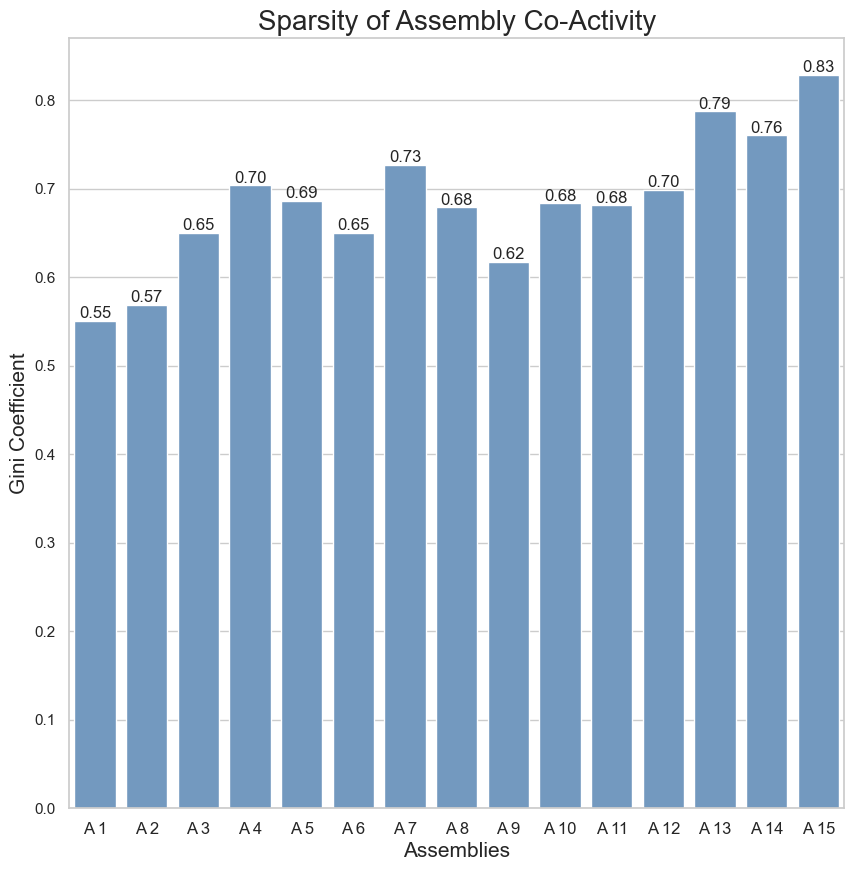

In [6]:
# new_ordered_assembly_coactivity_trace = np.vstack(
#     [activity_raster[:, A-1].mean(axis=1) for A in ordered_assemblies]).T
# new_ordered_assembly_coactivity_trace.shape

#get_assembly_time_trace(assembly_coactivity_trace)
plot_ginis(ordered_assembly_coactivity_trace)

### Setting up Natural Movie Work

In [7]:
import v1dd_physiology.data_fetching as daf
nwb_f = h5py.File('M409828_13_20181213.nwb', 'r')

In [8]:
sess_id = daf.get_session_id(nwb_f=nwb_f)
print(sess_id)

plane_ns = daf.get_plane_names(nwb_f=nwb_f)
print("Planes: ", plane_ns)

for plane_n in plane_ns:
    depth = daf.get_plane_depth(nwb_f=nwb_f, plane_n=plane_n)
    print(f'depth of {plane_n}: {depth} um')

M409828_13
Planes:  ['plane0', 'plane1', 'plane2', 'plane3', 'plane4', 'plane5']
depth of plane0: 242 um
depth of plane1: 258 um
depth of plane2: 274 um
depth of plane3: 290 um
depth of plane4: 306 um
depth of plane5: 322 um


In [9]:
# Get Repeated Natural Movies (11 NATURAL MOVIES SHOWN 9 TIMES)
# trial_fluorescence = []
presentation = nwb_f['stimulus']['presentation']
nm_timestamps = np.array(
    presentation['natural_movie'].get('timestamps'))
nm_data = np.array(presentation['natural_movie'].get('data')) # columns name dataset, gives you the start time, the end time, and the frame number for the natural movie data that was presented
new_clips = np.where(nm_data[:, 2] == 0)[0] # get the index where a new clip rotation begins (frame numbers repeat)
clip_duration = 300  

# new_clips[1]-1
# for repeat_id in range(new_clips.shape[0]):
#     frames_to_capture = np.where(f_ts >= nm_timestamps[new_clips[repeat_id]])[
#         0][0:clip_duration]
#     trial_fluorescence.append(f[frames_to_capture])
#     trial_fluorescence_np = np.array(trial_fluorescence)
#     for trial_idx in range(trial_fluorescence_np.shape[0]):
#         removed_trial = trial_fluorescence_np[trial_idx]
#         remaining_trials = np.delete(
#             trial_fluorescence_np, trial_idx, 0)
#         r, p = scipy.stats.pearsonr(
#             removed_trial, np.mean(remaining_trials, 0))
#         oracle_array[current_count, trial_idx] = r

/var/folders/37/xx86ns2176d3_9cr85gr_kch0000gn/T/ipykernel_19115/509438745.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  nm_timestamps = np.array(
/var/folders/37/xx86ns2176d3_9cr85gr_kch0000gn/T/ipykernel_19115/509438745.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  nm_data = np.array(presentation['natural_movie'].get('data')) # columns name dataset, gives you the start time, the end time, and the frame number for the natural movie data that was presented


In [10]:
f = ordered_assembly_coactivity_trace
passing_roi_count = f.shape[1] # 15

coactivity_during_movie = np.zeros((passing_roi_count, 300))
results = {}
# print(coactivity_trace)
f_ts = np.array(nwb_f['processing']['rois_and_traces_plane0']
                ['Fluorescence']['f_raw_subtracted'].get('timestamps'))

# Get Repeated Natural Movies
trial_fluorescence = []
presentation = nwb_f['stimulus']['presentation']
nm_timestamps = np.array(
    presentation['natural_movie'].get('timestamps'))
nm_data = np.array(presentation['natural_movie'].get('data'))[:-900] # don't use the last 900 frames, these are the "short" nms which are unrelated
new_clips = np.where(nm_data[:, 2] == 0)[0]
clip_duration = 300  # new_clips[1]-1

clip_ids = []
assembly_coactivity_time_traces = []
start_of_nms = np.where(f_ts > nm_data[0,0])[0][0] # find the frames where the natural movies start to be presented
end_of_nms = np.where(f_ts > nm_data[-1,1])[0][0] # find the frames where the natural movies finish presenting
for time_idx in range(start_of_nms, end_of_nms):
    idx_nm = np.where(nm_data[:,1] > f_ts[time_idx])[0][0] # get the first index
    total_frame_presented = nm_data[idx_nm, 2]
    within_repeats_frame_num = total_frame_presented % 3600
    clip_id = within_repeats_frame_num // 300
    clip_ids.append(clip_id)
    assembly_coactivity_time_traces.append(ordered_assembly_coactivity_trace[time_idx,:])

clip_ids = np.array(clip_ids).reshape(-1,1)
assembly_coactivity_time_traces = np.array(assembly_coactivity_time_traces)

####print(trial_fluorescence_np.shape)
# for trial_idx in range(trial_fluorescence_np.shape[0]):
#     removed_trial = trial_fluorescence_np[trial_idx]
#     remaining_trials = np.delete(
#         trial_fluorescence_np, trial_idx, 0)
#     r, p = scipy.stats.pearsonr(
#         removed_trial, np.mean(remaining_trials, 0))
#     movie_oracle_r_values[roi_n, trial_idx] = r

/var/folders/37/xx86ns2176d3_9cr85gr_kch0000gn/T/ipykernel_19115/3804506842.py:7: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  f_ts = np.array(nwb_f['processing']['rois_and_traces_plane0']
/var/folders/37/xx86ns2176d3_9cr85gr_kch0000gn/T/ipykernel_19115/3804506842.py:13: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  nm_timestamps = np.array(
/var/folders/37/xx86ns2176d3_9cr85gr_kch0000gn/T/ipykernel_19115/3804506842.py:15: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  nm_data = np.array(presentation['natural_movie'].get('data'))[:-900] # don't use the last 900 frames, these are the "short" nms which are unrelated


In [11]:
clip_ids.shape, assembly_coactivity_time_traces.shape

((13087, 1), (13087, 15))

In [12]:
nm_dff = np.load("../Data/Session13/sessionM409828_13_nm_dff.npy") # stefan extracted
nm_events = np.load("../Data/Session13/sessionM409828_13_nm_events.npy") # stefan extracted
nm_stimulus = np.load("../Data/Session13/sessionM409828_13_nm_stimulus.npy") 
# nm_stimulus is not time locked to the fluorescence presentation, should not use it for defining clip_ids. 

### Decoding of the Natural Movies

In [13]:
np.unique(clip_ids)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize lists to store accuracy for each neuron
accuracies = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(assembly_coactivity_time_traces, clip_ids, test_size=0.2, random_state=74)

# Initialize and train the Lasso Regression model
alpha = 0.1  # Regularization parameter
lasso_model = Ridge(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions
predictions = lasso_model.predict(X_test)

# Round the predictions to the nearest integer to get the decoded clip IDs
decoded_clip_ids = predictions.round().astype(int)

# Print out the accuracy
print("Accuracy Score of", accuracy_score(y_test, decoded_clip_ids))


# # Create a dataframe to store the results
# results_df = pd.DataFrame({'Assembly': range(1, num_assemblies + 1), 'Accuracy': accuracies})

# # Plot the results using Seaborn
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Assembly', y='Accuracy', data=results_df, palette='viridis')
# plt.title('Accuracy of Decoding Natural Movie Clip IDs for Each Assembly')
# plt.xlabel('Neuron')
# plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for accuracy range
# plt.show()

Accuracy Score of 0.14285714285714285


Accuracy Score of 0.7459893048128342


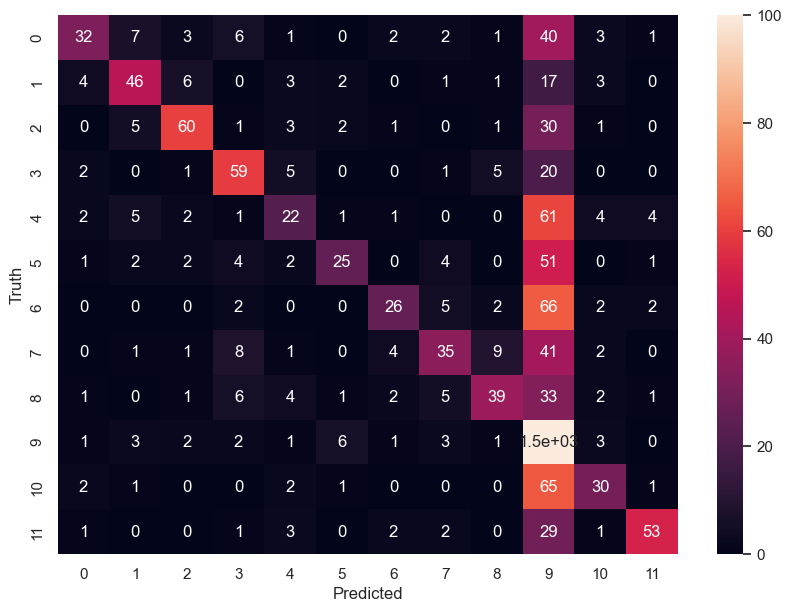

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

# # assuming clip_ids and assembly_coactivity_time_traces are your numpy arrays
# clip_ids = np.random.randint(0, 12, size=(13087, 1)) 
# assembly_coactivity_time_traces = np.random.rand(13087, 15)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(assembly_coactivity_time_traces, clip_ids.ravel(), test_size=0.2, random_state=74)

# train the model
clf = RandomForestClassifier(n_estimators=100, random_state=74)
clf.fit(X_train, y_train)

# predict the clip_ids
y_pred = clf.predict(X_test)

# print out the accuracy
print("Accuracy Score of", accuracy_score(y_test, y_pred))

# plot the confusion matrix
# The columns represent the original or expected class distribution, and the 
# rows represent the predicted or output distribution by the classifier.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, vmax = 100)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy Score of 0.7433155080213903


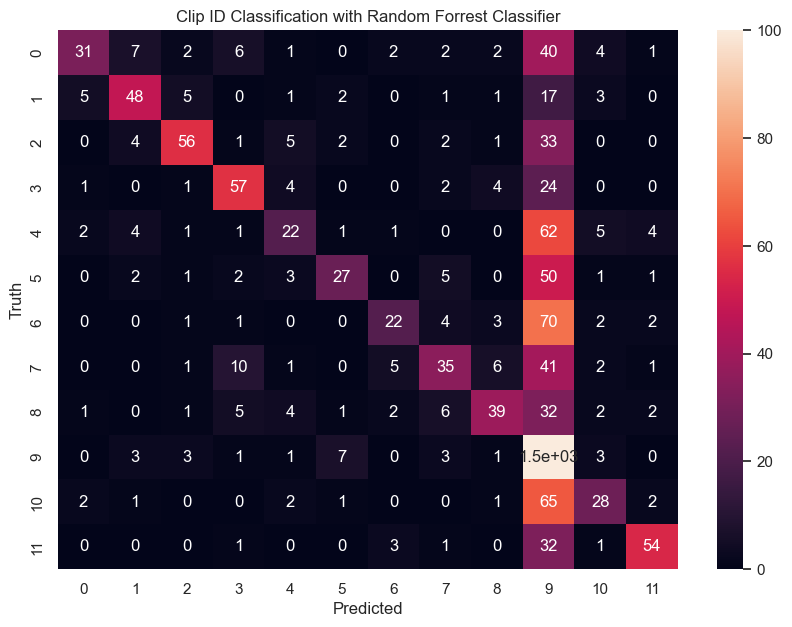

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(assembly_coactivity_time_traces, clip_ids.ravel(), test_size=0.2, random_state=74)

# define the model
clf = RandomForestClassifier(random_state=74)

# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create the grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search
grid_search.fit(X_train, y_train)

# get the best model
best_clf = grid_search.best_estimator_

# predict the clip_ids
y_pred = best_clf.predict(X_test)

# print out the accuracy
print("Accuracy Score of", accuracy_score(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, vmax = 100)
plt.title("Clip ID Classification with Random Forrest Classifier")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Accuracy Score of 0.7498090145148969


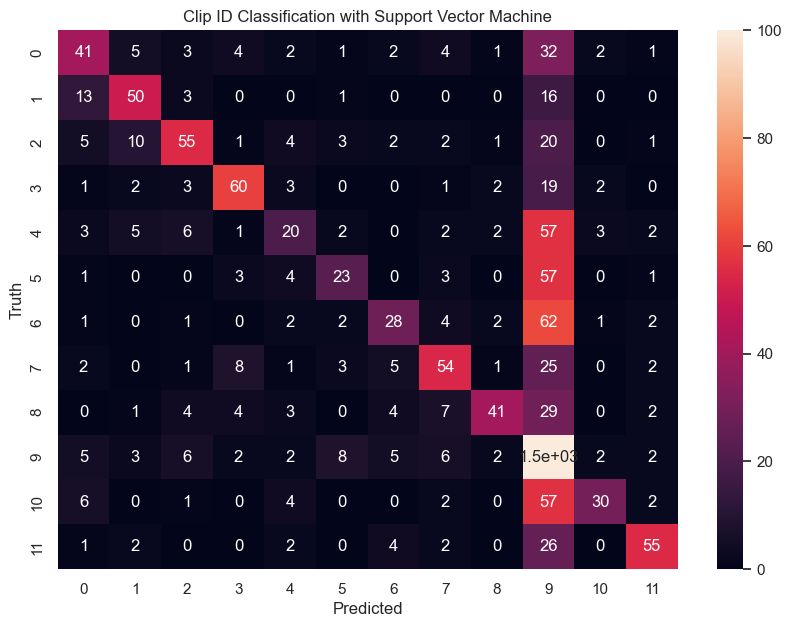

In [34]:
from sklearn.svm import SVC

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(assembly_coactivity_time_traces, clip_ids.ravel(), test_size=0.2, random_state=74)

#SVMs work best when the data is scaled
from sklearn.preprocessing import StandardScaler
# fit the scaler to the training data and transform it, and apply it to test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the model
clf = SVC(random_state=74)

# define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# create the grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# get the best model
best_clf = grid_search.best_estimator_

# predict the clip_ids
y_pred = best_clf.predict(X_test_scaled)

# print out the accuracy
print("Accuracy Score of", accuracy_score(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, vmax = 100)
plt.title("Clip ID Classification with Support Vector Machine")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jawagnercarena/opt/anaconda3/envs/cs109a/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

Accuracy Score of 0.7578304048892284


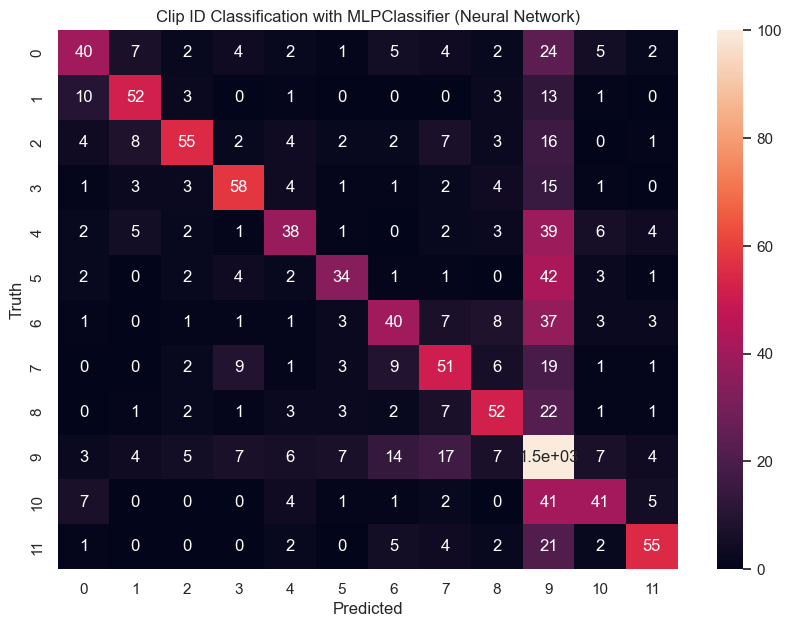

In [35]:
from sklearn.neural_network import MLPClassifier

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(assembly_coactivity_time_traces, clip_ids.ravel(), test_size=0.2, random_state=74)

# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the model
clf = MLPClassifier(random_state=74)

# define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# create the grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search
grid_search.fit(X_train_scaled, y_train)

# get the best model
best_clf = grid_search.best_estimator_

# predict the clip_ids
y_pred = best_clf.predict(X_test_scaled)

# print out the accuracy
print("Accuracy Score of", accuracy_score(y_test, y_pred))

# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, vmax = 100)
plt.title("Clip ID Classification with MLPClassifier (Neural Network)")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

(array([ 968.,  487.,  484.,  484.,  485.,  484.,  484.,  484., 7759.,
         968.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

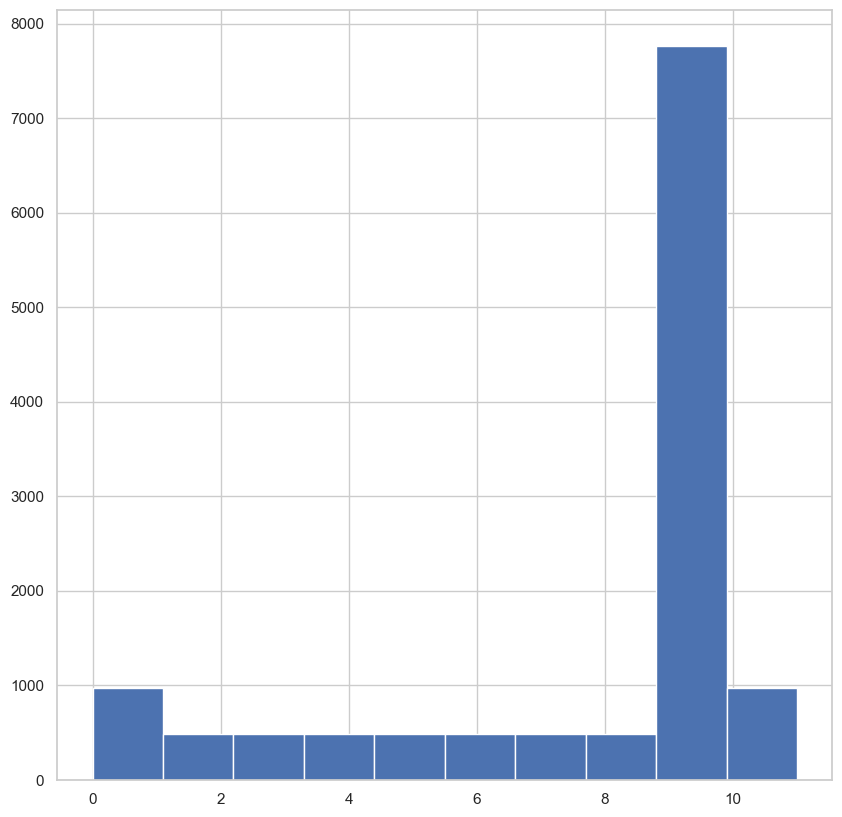

In [24]:
plt.hist(clip_ids)

### Old Work - will most likely delete

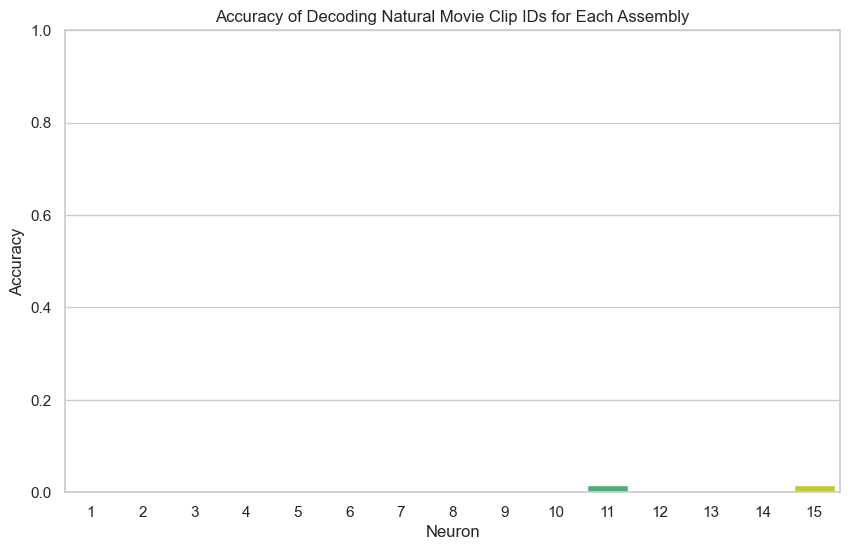

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

num_assemblies = 15
num_time_steps = 300

# Initialize lists to store accuracy for each neuron
accuracies = []

# Iterate over each neuron
for A_id in range(num_assemblies):
    # Extract dF/F data for the current neuron
    A_trace = coactivity_during_movie[A_id, :]

    # Reshape 'neuron_dFF' to a 2D array to match X_train and X_test
    A_trace = np.reshape(A_trace, (-1, 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(A_trace, clip_ids, test_size=0.2, random_state=74)

    # Initialize and train the Lasso Regression model
    alpha = 0.1  # Regularization parameter
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Make predictions
    predictions = lasso_model.predict(X_test)

    # Round the predictions to the nearest integer to get the decoded clip IDs
    decoded_clip_ids = predictions.round().astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, decoded_clip_ids)
    accuracies.append(accuracy)

# Create a dataframe to store the results
results_df = pd.DataFrame({'Assembly': range(1, num_assemblies + 1), 'Accuracy': accuracies})

# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Assembly', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Decoding Natural Movie Clip IDs for Each Assembly')
plt.xlabel('Neuron')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for accuracy range
plt.show()

In [7]:
with open('../Figure3/map_ordered_to_sgc_output.pickle', 'rb') as f:
    map_ordered_to_sgc_output = pickle.load(f)
map_ordered_to_sgc_output

{1: 8,
 2: 9,
 3: 1,
 4: 12,
 5: 14,
 6: 10,
 7: 13,
 8: 15,
 9: 6,
 10: 3,
 11: 11,
 12: 5,
 13: 2,
 14: 4,
 15: 7}

In [52]:
correct_order = []
for i in map_ordered_to_sgc_output.values():
    correct_order.append(i)
correct_order = np.array(correct_order)
print(correct_order)

ordered_assembly_coactivity_trace = assembly_coactivity_trace[:,correct_order - 1]

[ 8  9  1 12 14 10 13 15  6  3 11  5  2  4  7]


In [63]:
largest_a = ordered_assembly_coactivity_trace[:,1].reshape(-1,1) # largest assembly
print(largest_a.shape)

(21616, 1)


In [64]:
nm_stimulus.shape

(3014, 304, 608)

In [17]:
assembly_activations = nm_dff[:,prime_a]
assembly_activations.shape

(3014, 1016)

In [23]:
train_test_split = 0.2
length_of_all_movies = nm_stimulus.shape[0]
flatten_stimulus = nm_stimulus.reshape(nm_stimulus.shape[0],-1)
train_length = int(length_of_all_movies * (1 - train_test_split))

train_movies = flatten_stimulus[:train_length,:]
test_movies = flatten_stimulus[train_length:,:]
train_assembly_activations = assembly_activations[:train_length,:]
valid_assembly_activations = assembly_activations[train_length:,:]

In [25]:
# grid search hyperparameters for lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

### sepertae training and valid data
# stimulus = nm_stimulus.reshape(nm_stimulus.shape[0],-1)
# assembly_activations = nm_dff[:,prime_a]

# length_of_all_movies = stimulus.shape[0]
# train_length = int(length_of_all_movies * 0.8)

# train_stimulus = stimulus[:train_length]
# valid_stimulus = stimulus[train_length:]
# train_assembly_activations = assembly_activations[:train_length]
# valid_assembly_activations = assembly_activations[train_length:]


model = LinearRegression()

cv = RepeatedKFold(n_splits=10, n_repeats= 3, random_state=74)
# define grid
grid = dict()
#grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(train_movies, train_assembly_activations)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


MAE: 0.000
Config: {}


In [26]:
from sklearn.metrics import mean_squared_error
train_stimulus_prediction = search.predict(train_assembly_activations)
valid_stimulus_prediction = search.predict(valid_assembly_activations)
train_mean_squared_error = mean_squared_error(train_movies, train_stimulus_prediction)
valid_mean_squared_error = mean_squared_error(test_movies, valid_stimulus_prediction)

train_mean_squared_error, valid_mean_squared_error

ValueError: X has 1016 features, but LinearRegression is expecting 184832 features as input.

In [57]:
np.random.randint(0, 10, size=100)

array([6, 9, 2, 6, 9, 8, 3, 0, 1, 0, 4, 4, 6, 8, 8, 2, 2, 2, 3, 7, 5, 7,
       0, 7, 3, 0, 7, 3, 5, 7, 3, 2, 8, 2, 8, 1, 1, 1, 5, 2, 8, 3, 0, 3,
       0, 4, 3, 7, 7, 6, 2, 0, 0, 2, 5, 6, 5, 5, 5, 2, 5, 7, 1, 4, 0, 0,
       4, 2, 3, 2, 0, 0, 4, 5, 2, 8, 4, 7, 0, 4, 2, 0, 3, 4, 6, 0, 2, 1,
       8, 9, 5, 9, 2, 7, 7, 1, 5, 6, 1, 9])

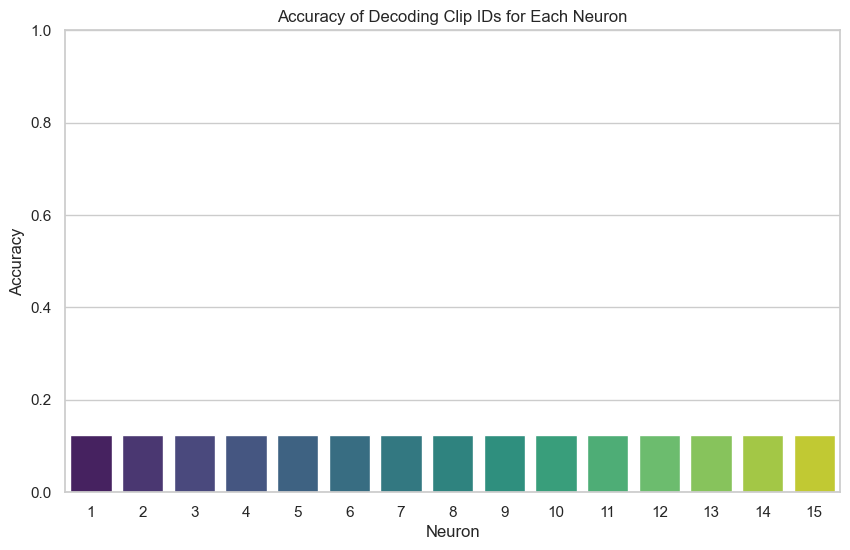

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate example data
num_neurons = 15
num_time_steps = 1000

neuron_dFF_data = np.random.rand(num_time_steps, num_neurons)  # Example dF/F data for neurons
clip_ids_data = np.random.randint(0, 10, size=num_time_steps)  # Example clip IDs

# Initialize lists to store accuracy for each neuron
accuracies = []

# Iterate over each neuron
for neuron_idx in range(num_neurons):
    # Extract dF/F data for the current neuron
    neuron_dFF = neuron_dFF_data[:, neuron_idx]

    # Reshape 'neuron_dFF' to a 2D array to match X_train and X_test
    neuron_dFF = np.reshape(neuron_dFF, (-1, 1))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(neuron_dFF, clip_ids_data, test_size=0.2, random_state=42)

    # Initialize and train the Lasso Regression model
    alpha = 0.1  # Regularization parameter
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Make predictions
    predictions = lasso_model.predict(X_test)

    # Round the predictions to the nearest integer to get the decoded clip IDs
    decoded_clip_ids = predictions.round().astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, decoded_clip_ids)
    accuracies.append(accuracy)

# Create a dataframe to store the results
results_df = pd.DataFrame({'Neuron': range(1, num_neurons + 1), 'Accuracy': accuracies})

# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Neuron', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy of Decoding Clip IDs for Each Neuron')
plt.xlabel('Neuron')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for accuracy range
plt.show()

In [ ]:
# Fit a linear regression model
lreg = LinearRegression(fit_intercept = True).fit(x_poly_train, y_train)

In [ ]:
3014 / 8

376.75

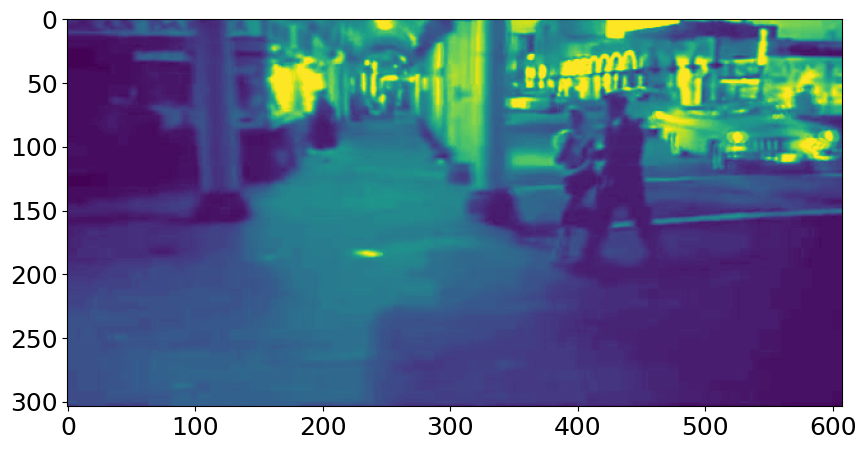

In [ ]:
plt.imshow(nm_stimulus[360])

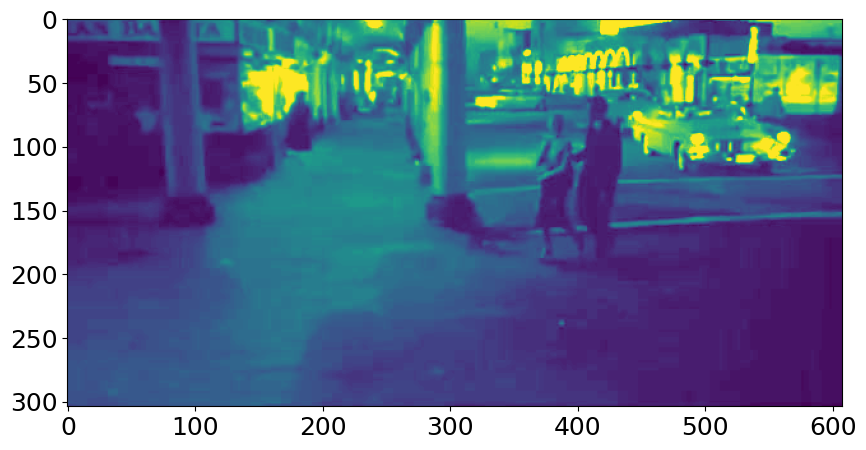

In [ ]:
plt.imshow(nm_stimulus[732])

In [ ]:
#### Commented out code that won't be used for now
            # May need to do this to reconstruct the neurons
            # nonzero_midpoint = int(
            #     len(daf.get_roi_mask(nwb_f, plane_n, roi_n).nonzero()[1])/2)
            # x = daf.get_roi_mask(nwb_f, plane_n, roi_n).nonzero()[
            #     0][nonzero_midpoint]
            # y = daf.get_roi_mask(nwb_f, plane_n, roi_n).nonzero()[
            #     1][nonzero_midpoint]
            # coords.append((x, y, depth))

            # # Spatio Temporal Receptive Field
            # daf.get_strf(plan_n=plane_n, roi_n=roi_n, trace_type='fluorescence')

            # print(daf.get_roi_mask(nwb_f, plane_n, roi_n))
            # mask = daf.get_roi_mask(nwb_f, plane_n, roi_n) == 1
            # roi_mask_locations = plane_projection[plane_number][mask]
            # mask = daf.get_roi_mask(nwb_f, plane_n, roi_n)
            # h, w, _ = mask.shape
            # contours, _ = cv2.findContours(process(img), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # contours[0]
            # mask[mask > 0][0]

            # rois.append(plane_n+'_'+roi_n)
            # pika_rois.append(pika_roi_ids[roi_count])
            # f, ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='subtracted')
            # A way to get the F not using daf
            # f = list(np.array(nwb_f['processing']['rois_and_traces_'+str(plane_n)]['Fluorescence']['f_raw_subtracted'].get('data'))[roi_number, :])
            ###f, f_ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='subtracted')
            # fs.append(f[0:clip_ts])
            # locomotions.append([])
            # for f_t in range(f_ts.shape[0]):
            #     time_window_start = f_ts[f_t]
            #     if (f_t >= f_ts.shape[0]-1) or (f_ts[f_t+1] > max(locomotion_timestamps)):
            #         time_window_end = max(locomotion_timestamps)
            #     else:
            #         time_window_end = f_ts[f_t+1]
            #     if time_window_end >= min(locomotion_timestamps):
            #         locomotion_to_sum = np.where((locomotion_timestamps > time_window_start) * (locomotion_timestamps < time_window_end))[0]
            #         locomotions[-1].append(np.sum(locomotion_delta[locomotion_to_sum]))
            #     else:
            #         locomotions[-1].append(0)
            ###dff, dff_ts = daf.get_single_trace(nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='dff')
            # dffs.append(dff[0:clip_ts])
            # event, event_ts = daf.get_single_trace(
            #     nwb_f=nwb_f, plane_n=plane_n, roi_n=roi_n, trace_type='events')
            # events.append(event[0:clip_ts])
            # print(len(f), len(dff), len(event))